## This version does the ZOGY but computes the kernels in fourier space, and then convolves images in real space.

Do it with new testing object.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import pandas as pd

Use the code from `diffimTests.py`.

In [2]:
import diffimTests as dit
reload(dit)

# Let's try w same parameters as ZOGY paper.
sky = 300.

testObj = dit.DiffimTest(imSize=(512,512), sky=sky, offset=[0,0], psf_yvary_factor=0., varSourceChange=1500., 
                         theta1=0., theta2=-45., im2background=0., n_sources=50, sourceFluxRange=(500,30000), 
                         seed=66)

print dit.computeClippedImageStats(testObj.im1.im)
print dit.computeClippedImageStats(testObj.im2.im)
print dit.computeClippedImageStats(testObj.im1.var)
print dit.computeClippedImageStats(testObj.im2.var)

LSSTSW has not been set up.
LSSTSW has not been set up.
Template PSF: [1.6, 1.6] 0.0
Science PSF: [1.8, 2.2] -45.0
0.824621125124
Offset: [0, 0]
PSF y spatial-variation: 0.0 0.0
Variable source: 245.899250131 279.361590046 1423.89964966 2923.89964966
Template PSF: [1.6, 1.6] 0.0
Science PSF: [1.8, 2.2] -45.0
0.824621125124
Offset: [0, 0]
PSF y spatial-variation: 0.0 0.0
Variable source: 245.221932537 348.22282075 6236.27669135 7736.27669135
(0.058941207521673616, 17.142582277831181, -74.0, 1741.5550996425638)
(0.16735074378053241, 17.213851327082029, -82.0, 1169.0572762553779)
(300.05894120752163, 17.142582277831185, 226.0, 2041.5550996425638)
(300.16735074378062, 17.213851327082025, 218.0, 1469.0572762553779)


In [3]:
reload(dit)
testObj.doZOGY()
testObj.doAL(spatialKernelOrder=0, spatialBackgroundOrder=1)
print dit.computeClippedImageStats(testObj.D_ZOGY)
print dit.computeClippedImageStats(testObj.D_AL)

LSSTSW has not been set up.
(-0.00091947242517415647, 0.98658704961809673, -4.8670228593549725, 4.4550357952974924)
(-0.0032094202315248706, 0.98331598712371071, -4.7303152583239774, 5.79327599607051)


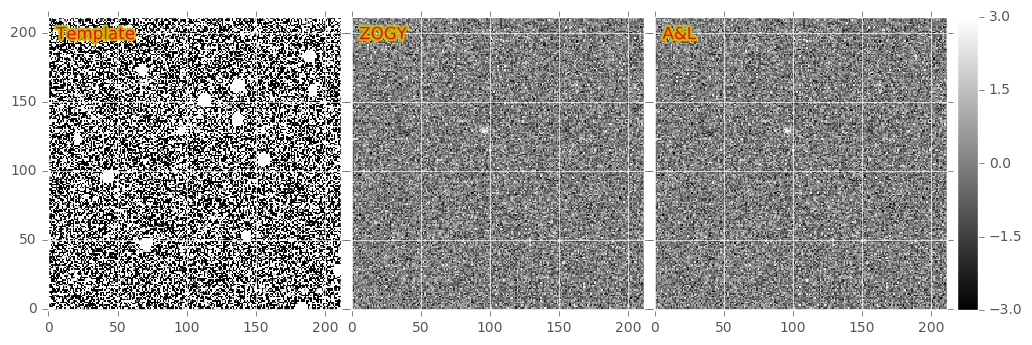

In [4]:
xim = np.arange(-256, 256, 1)
yim = xim.copy()

fig = plt.figure(1, (12, 12))
x1d, x2d, y1d, y2d = 150, 512-150, 150, 512-150   # limits for display
extent = (xim.min()+150, xim.max()-150, yim.min()+150, yim.max()-150)
dit.plotImageGrid((testObj.im1.im[x1d:x2d,y1d:y2d], testObj.D_ZOGY[x1d:x2d,y1d:y2d], testObj.D_AL[x1d:x2d,y1d:y2d]), 
                  clim=(-3,3), titles=['Template', 'ZOGY', 'A&L'])

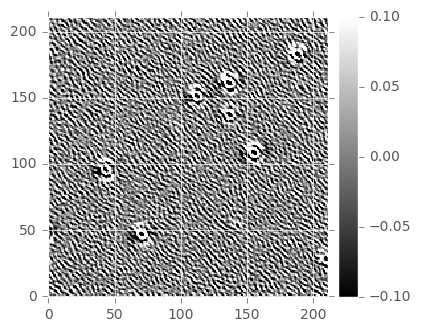

In [5]:
D = testObj.D_ZOGY.copy()
D_AL = testObj.D_AL.copy()

D[0,:] = D[:,0] = D[-1,:] = D[:,-1] = 0.
D_AL[D == 0] = 0.
fig = plt.figure(1, (4, 4))
dit.plotImageGrid(((D - D_AL)[x1d:x2d,y1d:y2d],), clim=(-0.1, 0.1))

Work on variance planes.

LSSTSW has not been set up.
(0.01077144073274227, 0.97869437990325636, -4.5278737175857424, 9.1270046941377121)
(-0.00091947242517415647, 0.98658704961809673, -4.8670228593549725, 4.4550357952974924)
(245.89925013100506, 279.36159004560153) 9.12700469414
29


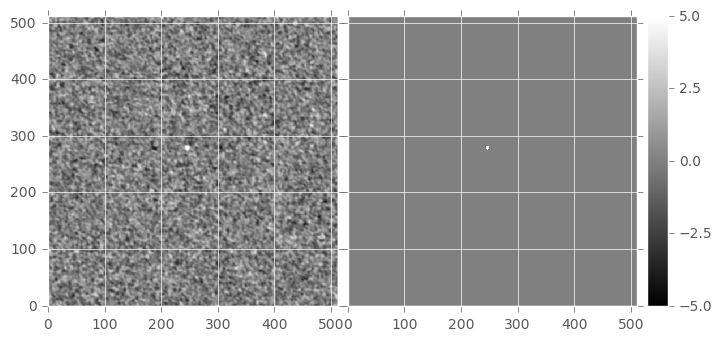

In [6]:
reload(dit);

S_corr, S = testObj.S_corr_ZOGY, testObj.S_ZOGY
print dit.computeClippedImageStats(S_corr)
print dit.computeClippedImageStats(S)
print testObj.changedCentroid, S_corr[np.rint(testObj.changedCentroid[1]).astype(int), \
                                      np.rint(testObj.changedCentroid[0]).astype(int)]
print (S_corr > 5.).sum() + (S_corr < -5.).sum()
fig = plt.figure(1, (8, 8))
dit.plotImageGrid((S_corr, ((S_corr > 5.)*5.0 + (S_corr < -5.)*-5.0)), clim=(-5.,5.))

### Try the reverse case where science is narrower than template...

For A&L, turn on pre-filtering.

In [7]:
reload(dit)
testObj2 = testObj.clone()
testObj2.reverseImages()

testObj2.doZOGY()
print dit.computeClippedImageStats(testObj2.D_ZOGY)
testObj2.doAL(spatialKernelOrder=0, spatialBackgroundOrder=1, doPreConv=False)
print dit.computeClippedImageStats(testObj2.D_AL)
D_AL = testObj2.D_AL  # save the non-preconv-ed version
testObj2.doAL(spatialKernelOrder=0, spatialBackgroundOrder=1, doPreConv=True)
print dit.computeClippedImageStats(testObj2.D_AL)

LSSTSW has not been set up.
(0.00091947242517415647, 0.98658704961809673, -4.4550357952974924, 4.8670228593549725)
(-0.0038280349149881106, 0.96786314038086319, -6.802024644667358, 19.488031150467407)
(-0.00061829480694426675, 0.18246091269917697, -1.5215815590025041, 2.6067140010223824)


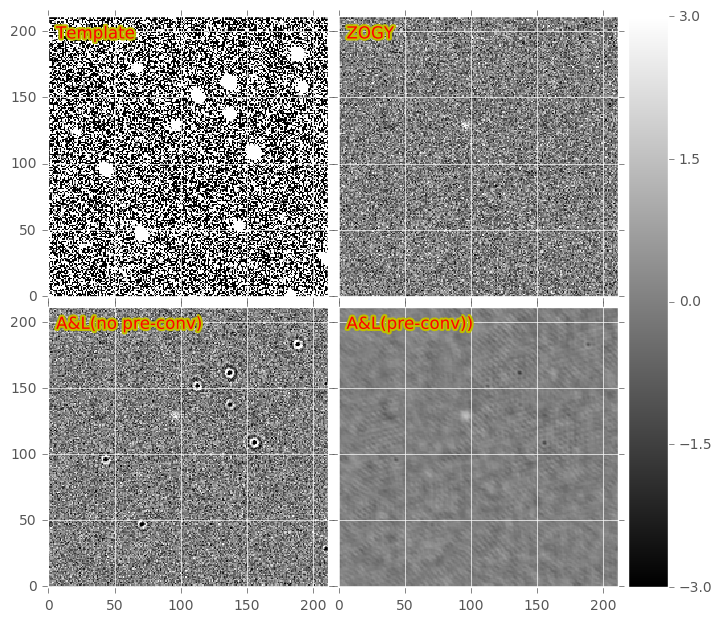

In [9]:
fig = plt.figure(1, (8, 8))
dit.plotImageGrid((testObj2.im1.im[x1d:x2d,y1d:y2d], -testObj2.D_ZOGY[x1d:x2d,y1d:y2d], 
                   -D_AL[x1d:x2d,y1d:y2d], -testObj2.D_AL[x1d:x2d,y1d:y2d]), 
                  clim=(-3,3), titles=['Template', 'ZOGY', 'A&L(no pre-conv)', 'A&L(pre-conv))'])

(-0.00061829480694426675, 0.18246091269917697, -1.5215815590025041, 2.6067140010223824)
118


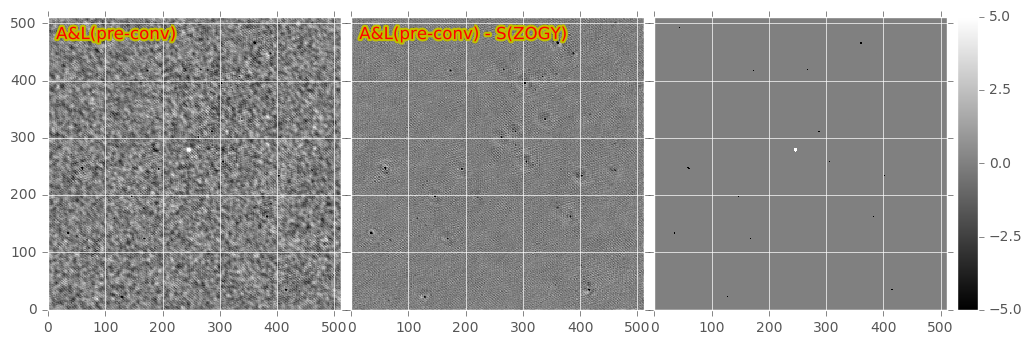

In [10]:
dstats = dit.computeClippedImageStats(testObj2.D_AL)
print dstats
#D_AL_pc_ALZC /= 3.0
tmp = (testObj2.D_AL - dstats[0]) / dstats[1]
print (tmp > 5.).sum() + (tmp < -5.).sum()
fig = plt.figure(1, (12, 12))
dit.plotImageGrid((-tmp, -(tmp-testObj2.S_corr_ZOGY), ((tmp > 5.)*-5. + (tmp < -5.)*5.)), clim=(-5., 5.),
                 titles=['A&L(pre-conv)', 'A&L(pre-conv) - S(ZOGY)', ''])